In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [4]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
tf=df.head(20)

In [6]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
# assuming Purchased as target variable
X = df.drop('Purchased', axis=1)
y = df['Purchased']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
# Assuming 'X' is your feature dataset with a 'gender' column
# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [10]:
clf = DecisionTreeClassifier(random_state=42)

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [14]:
# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80


Confusion Matrix:
[[49  3]
 [ 6 22]]


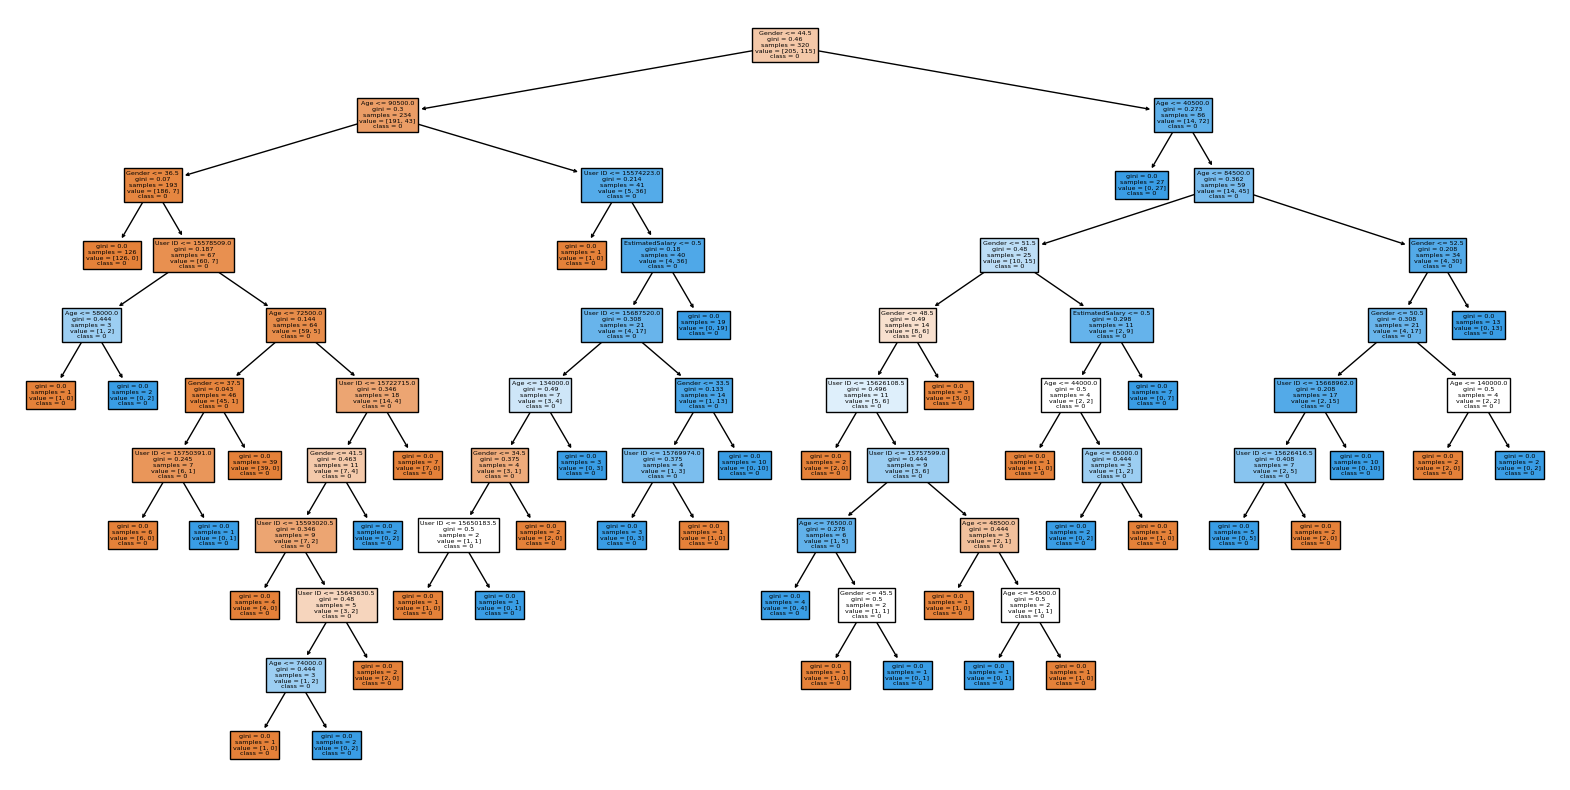

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your trained decision tree classifier, X is your feature matrix, and df['Purchased'] is your target variable
feature_names = list(X.columns)

# Convert numeric labels to strings
class_names = list(map(str, tf['Purchased']))

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [16]:
# inference
The model achieved an impressive accuracy of 0.89.
The model shows good precision and recall for both classes, with slightly higher performance for class 0.
The F1-scores indicate a balance between precision and recall for both classes.
The weighted average F1-score, considering class imbalance, is 0.89, matching the overall accuracy.
In conclusion, the classification report suggests that the model performs well in distinguishing between the two classes, with a balanced trade-off between precision and recall.
